In [ ]:
import numpy as np 
import pandas as pd 
import os
from glob import glob
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import fnmatch
import tensorflow as tf
from time import sleep
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,BatchNormalization,MaxPooling2D,Activation
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as k
import matplotlib.image as mpimg
import os
from tensorflow.keras import layers 
from tensorflow.keras import Model

from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
plt.rcParams['figure.figsize'] = (12,7)

In [ ]:
print(os.listdir("data/cell-images-for-detecting-malaria/cell_images"))

['Uninfected', 'Parasitized', 'cell_images']


In [ ]:
infected = os.listdir("data/cell-images-for-detecting-malaria/cell_images/Parasitized")
infected_path = "data/cell-images-for-detecting-malaria/cell_images/Parasitized"
uninfected = os.listdir("data/cell-images-for-detecting-malaria/cell_images/Uninfected")
uninfected_path = "data/cell-images-for-detecting-malaria/cell_images/Uninfected"

In [ ]:
print("Length of infected data = ", len(infected), 'images')
print("Length of uninfected data = ", len(uninfected), 'images')

Length of infected data =  13780 images
Length of uninfected data =  13780 images


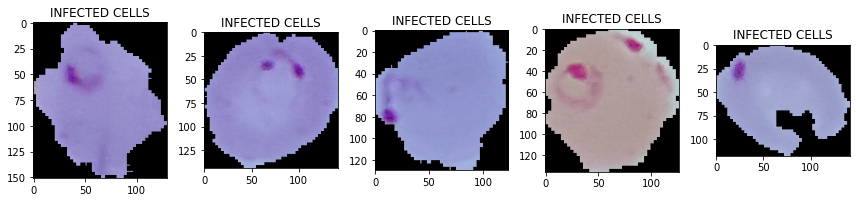

In [ ]:
# Infected cells

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.imread(infected_path + '/' + infected[i]))
    plt.title('INFECTED CELLS')
    plt.tight_layout()
plt.show()

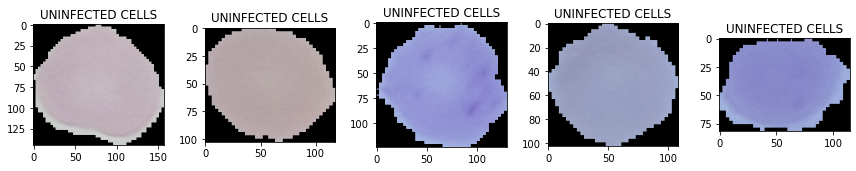

In [ ]:
# Uninfected cells

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.imread(uninfected_path + '/' + uninfected[i]))
    plt.title('UNINFECTED CELLS')
    plt.tight_layout()
plt.show()

In [ ]:
img_shape = (130, 130, 3)
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/225,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              validation_split=0.2)

In [ ]:
train = image_gen.flow_from_directory('data/cell-images-for-detecting-malaria/cell_images/cell_images',
                                     target_size = img_shape[:2],
                                     color_mode = 'rgb',
                                     batch_size = 32,
                                     class_mode = 'binary',
                                     subset = 'training',
                                     shuffle = True)

test = image_gen.flow_from_directory('data/cell-images-for-detecting-malaria/cell_images/cell_images',
                                     target_size = img_shape[:2],
                                     color_mode ='rgb',
                                     batch_size = 32,
                                     class_mode = 'binary',
                                     subset = 'validation',
                                     shuffle = False)

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (130, 130, 3), include_top = False, weights = 'imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
inc_history = model.fit(train, validation_data = test, steps_per_epoch = 100, epochs = 10)

Epoch 1/10
100/100 [==============================] - 103s 1s/step - loss: 0.8936 - acc: 0.7853 - val_loss: 0.4104 - val_acc: 0.8321
Epoch 2/10
100/100 [==============================] - 63s 636ms/step - loss: 0.3696 - acc: 0.8641 - val_loss: 0.3703 - val_acc: 0.8584
Epoch 3/10
100/100 [==============================] - 60s 601ms/step - loss: 0.3470 - acc: 0.8694 - val_loss: 0.3207 - val_acc: 0.8710
Epoch 4/10
100/100 [==============================] - 57s 576ms/step - loss: 0.3509 - acc: 0.8634 - val_loss: 0.3035 - val_acc: 0.8835
Epoch 5/10
100/100 [==============================] - 57s 574ms/step - loss: 0.3435 - acc: 0.8684 - val_loss: 0.5779 - val_acc: 0.7831
Epoch 6/10
100/100 [==============================] - 55s 557ms/step - loss: 0.3297 - acc: 0.8813 - val_loss: 0.3043 - val_acc: 0.8831
Epoch 7/10
100/100 [==============================] - 53s 533ms/step - loss: 0.3315 - acc: 0.8678 - val_loss: 0.2983 - val_acc: 0.8835
Epoch 8/10
100/100 [==============================] - 52s

In [ ]:
model.evaluate(test, verbose=1)

173/173 [==============================] - 30s 173ms/step - loss: 0.3543 - acc: 0.8706


[0.3543110191822052, 0.8705989122390747]

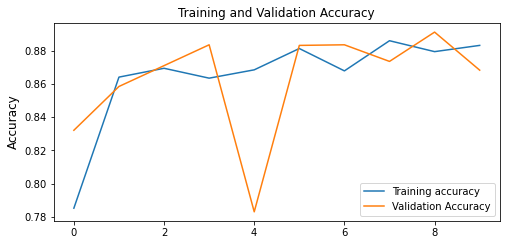

In [ ]:
acc = inc_history.history['acc']
loss = history.history["loss"]

val_acc = inc_history.history['val_acc']
# val_loss = history.history["val_loss"]

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc,label="Training accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.show()

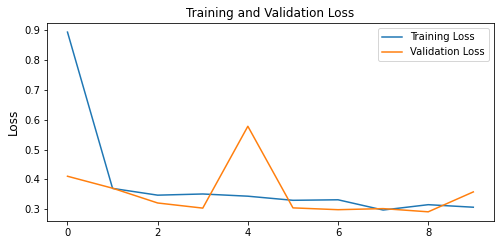

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(inc_history.history['loss'], label="Training Loss")
plt.plot(inc_history.history['val_loss'], label = "Validation Loss")
plt.legend()
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss",fontsize=12)
plt.show()